

Import packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1

This data set will involve the implementing several variants of
the Perceptron algorithm. Before we can build these models and measure their performance,
split the training data (i.e. spam train.txt) into a training set and a validation set, putting
the last 1000 emails into the validation set. Thus, we will have a new training set (call it
train.txt) with 4000 emails and a validation set (call it validation.txt) with 1000 emails.
we will not use spam test.txt until the end of the assignment.

In [2]:
file = open('spam_train.txt','r')
lines = file.readlines()
train_lines = [line.strip() for line in lines[:4000]]
val_lines = [line.strip() for line in lines[4000:]]
f = open('train.txt', 'w')
f.write('\n'.join(train_lines))
f.close()
f = open('validation.txt', 'w')
f.write('\n'.join(val_lines))
f.close()

Transform all of the data into feature vectors as follows. Build a vocabulary list
using only the 4000 e-mail training set by finding all words that occur across the training set.
Note that we assume that the data in the validation and test sets is completely unseen when
we train our model, and thus we do not use any information contained in them. Ignore all
words that appear in fewer than $X = 20$ e-mails of the 4000 e-mail training set – this is both
a means of preventing over-fitting (to be discussed in class) and of improving scalability. To
do this, write a function ``words`` which takes a data file as input and returns a
Python list containing all the words that occur in at least 20 emails.


In [3]:
import json
def words(data_file, X=20, N=-1):
    # X: frequency threshold
    # N: the number of emails used to generate the vocabulary
    # N = -1 denotes using all emails
    
    vocab = []
    file2 = open(data_file, 'r')
    lines = file2.readlines() 
    word_counts = {}
    if N != -1:
        lines = lines[:N]
    for line in lines:
        word_set = set(line.strip().split())
        for word in word_set:
            if word not in word_counts.keys():
                word_counts[word] = 1
            else:
                word_counts[word] += 1
    for word,count in word_counts.items():
        if count >= X:
            vocab.append(word)
    vocab.remove('0')
    vocab.remove('1')
    with open("vocabulary.json","w") as fOut:
        json.dump(vocab,fOut)
    return vocab




In [4]:

words('train.txt')

['manag',
 'gener',
 'an',
 'domain',
 'i',
 'futur',
 'afford',
 'now',
 'origin',
 'mail',
 'much',
 'fee',
 'it',
 'attract',
 'full',
 'more',
 'registr',
 'regist',
 'brand',
 'administr',
 'here',
 'in',
 'as',
 'price',
 'approv',
 'thi',
 'announc',
 'new',
 'that',
 'easier',
 'easi',
 'biggest',
 'cours',
 'control',
 'current',
 'from',
 'and',
 'promot',
 'excit',
 'for',
 'remov',
 'final',
 'dollarnumb',
 'extens',
 'panel',
 'com',
 'email',
 'or',
 'public',
 'is',
 'well',
 'us',
 'these',
 'net',
 'can',
 'click',
 'to',
 'includ',
 'have',
 'just',
 'sincer',
 'biz',
 'were',
 'of',
 'by',
 'be',
 'the',
 'same',
 'will',
 'you',
 'todai',
 'e',
 'rememb',
 'avail',
 'benefit',
 'on',
 'access',
 'ar',
 'your',
 'further',
 'httpaddr',
 'number',
 'address',
 'visit',
 'info',
 'recent',
 'compani',
 'name',
 'at',
 'discount',
 'right',
 'state',
 'appeal',
 'dai',
 'nbsp',
 'asset',
 'fill',
 'ow',
 'no',
 'our',
 'without',
 'process',
 'bank',
 'prepar',
 'main',

In [5]:
import json
with open("vocabulary.json") as fIn:
    vocab = json.load(fIn)
    print(len(vocab))

3115


For each email (in all three files), transform it into a feature vector x where the
j-th entry, $x_j$ is 1 if the j-th word in the vocabulary occurs in the email, and 0 otherwise.
To do this write a function ``feature_vector(email)`` that takes as input a single email and
returns the corresponding feature vector as a Python list.

In [6]:
def feature_vector(email, vocab_dict):
    # vocab_dict is a dictionary that maps words to index in vocabulary list
    result = np.zeros(len(vocab_dict))
    word_list = list(email.strip().split())
    for vocab in vocab_dict.keys():
        if vocab in word_list:
            result[vocab_dict[vocab]] = 1
    
    return result

### Step 2:
Implement ``perceptron_train`` and
``perceptron_error``. The function ``perceptron_train`` trains a perceptron
classifier using the examples provided to the function, and should return ``w``, ``k``, and ``iter``,
which are respectively the final classification vector (as a Python list), the number of updates
(i.e., mistakes) performed (integer), and the number of passes through the data (integer).
You may assume that the input data provided to your function is linearly separable (so the
stopping criterion should be that all points are correctly classified).

we don't add a bias feature to the feature vector (it turns out
not to improve classification accuracy, possibly because a frequently occurring word already
serves this purpose). Your implementation should cycle through the data points in the order
as given in the data files (rather than randomizing), so that results are consistent for grading
purposes.

The function ``perceptron_error`` should take as inputs the weight vector w and
a set of examples. The function should return the error rate, i.e., the fraction of examples
that are misclassified by ``w``.



In [7]:
from cmath import inf


def perceptron_train(train_x, train_y,max_iters=float(inf)):
    train_y = train_y * 2 - 1 # convert the {0,1} labels to {-1,1}
    n_data, n_feature = train_x.shape # n_data represents the training email numbers, while n_feature represents the vocabulary feature vectors' entries
    w = np.zeros(n_feature) # vector w to be trained
    iters = 0 # count the number of iterations
    k = 0 # count the number of mistakes

    stop = True
    while stop:
        mistake = 0
        for i in range(n_data):
            if train_y[i]*(np.dot(w,train_x[i]))<=0:
                w = w+train_y[i]*train_x[i]
                k+=1
                mistake += 1    
        iters += 1
        if iters > max_iters:
            break
        if mistake == 0:
            break
        

    
    return w, k, iters
        
def perceptron_error(w, val_x, val_y):
    val_y = val_y * 2 - 1
    n_data, n_feature = val_x.shape
    n_correct = 0 # number of samples correctly classified

    for i in range(n_data):
        if (w.dot(val_x[i])>=0) and (val_y[i] == 1):
            n_correct +=1
        elif (w.dot(val_x[i])<0) and (val_y[i] == -1):
            n_correct +=1

    return 1 - n_correct / n_data

### Step 3:

Train the linear classifier using your training set. How many mistakes are made before the algorithm terminates? Test the implementation of perceptron test by running it with the learned parameters and the training data, making sure that the training error is zero. Next, classify the emails in the validation set and figure out the validation error.

In [8]:
def feature_vectors(data_file, vocabulary):
    # convert a file to x, y array
    
    with open(data_file,'r') as fp:
        lines = fp.readlines()
        len_line = len(lines)
    vocab_dict = {}
    x = []
    y = np.zeros(len_line)
    m = 0
    k = 0
    # Here we build up the vocab_dict
    with open("vocabulary.json") as fIn:
            vocab = json.load(fIn)
            for i in vocab:
                vocab_dict[i] = k
                k = k+1
    for line in lines:
        # Here we build up y vector
        word_list = list(line.strip().split())
        word_first =word_list[0]
        y[m] = word_first
        m += 1
        # Here we build up x vector
        x_vector = feature_vector(line, vocab_dict)
        x.append(x_vector)
    
    x = np.array(x)

               
    
    return x, y

vocabulary = words('train.txt')
train_x, train_y = feature_vectors('train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y)
print('Errors made:', k)
val_x, val_y = feature_vectors('validation.txt', vocabulary)
print('Validation error: %.6f' % perceptron_error(w, val_x, val_y))

Errors made: 415
Validation error: 0.016000


### Step 4

To better understand how the spam classifier works, we can inspect the
parameters to see which words the classifier thinks are the most predictive of spam. Using
the vocabulary list together with the parameters learned in the previous step, output
the 12 words with the most positive weights.


In [9]:
p_index = np.argpartition(w, -12)[-12:]
p_word = []
for i in p_index:
    p_word.append(vocabulary[i])
print('Most positive words:',p_word)

Most positive words: ['offer', 'access', 'am', 'our', 'internet', 'deathtospamdeathtospamdeathtospam', 'sight', 'guarante', 'remov', 'click', 'pleas', 'these']


12 words that have the most negative weights?

In [10]:
n_index = np.argpartition(w, 12)[:12]
n_word = []
for i in n_index:
    n_word.append(vocabulary[i])
print('Most negative words:',n_word)

Most negative words: ['prefer', 'there', 'reserv', 'wrote', 'i', 'copyright', 'server', 'run', 'said', 'date', 'still', 'url']


### Step 5
We should expect that the test error decreases as the amount of training
data increases. Using only the first $N$ rows of your training data, run both the perceptron
algorithm on this smaller training set and evaluate the corresponding validation error (using
all of the validation data). Do this for $N = 100, 200, 400, 800, 2000, 4000$, and create a plot
of the validation error as a function of $N$.

In [11]:
def hyperparameter_test(X=20, N=-1):
    # X: frequency threshold
    # N: the number of emails used to generate the vocabulary
    # In Q6 you will need to add an extra argument max_iters
    # Returns: the number of iterations and the error rate

    with open('train.txt','r') as file:
        lines = file.readlines()
        partial_lines = [line.strip() for line in lines[:N]]
    with open('partial_train.txt','w') as file2:
        file2.write('\n'.join(partial_lines))
        
    vocabulary = words('partial_train.txt',X=20,N=N)
    train_x, train_y = feature_vectors('partial_train.txt', vocabulary)
    w, k, iters = perceptron_train(train_x, train_y)
    val_x, val_y = feature_vectors('validation.txt', vocabulary)
    error = perceptron_error(w, val_x, val_y)
    print(iters, error)
    return iters, error

In [12]:
Ns = [100, 200, 400, 800, 4000]
# N = 2000 isn't linear seperable, so we delete it to make the graph smooth.
validation_errors = []
iterations = []
for N in Ns:
    print('Now training with %d samples' % N)
    iters, error = hyperparameter_test(N = N)
    validation_errors.append(error)
    iterations.append(iters)

Now training with 100 samples
10 0.125
Now training with 200 samples
5 0.08299999999999996
Now training with 400 samples
5 0.040000000000000036
Now training with 800 samples
12 0.02300000000000002
Now training with 4000 samples
9 0.016000000000000014


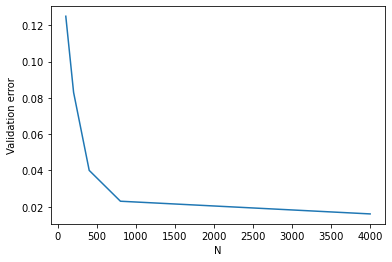

In [13]:
plt.plot(Ns, validation_errors)
plt.xlabel('N')
plt.ylabel('Validation error')
plt.show()

Also for $N = 100, 200, 400, 800, 2000, 4000$, create a plot of the number of
perceptron iterations as a function of N, where by iteration we mean a complete pass through
the training data. As the amount of training data increases, the margin of the training set
decreases, which generally leads to an increase in the number of iterations perceptron takes
to converge (although it needs not be monotonic).

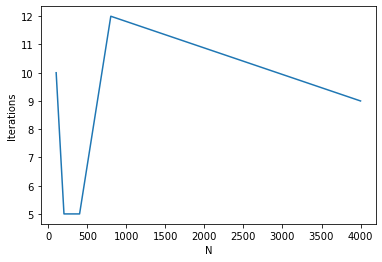

In [14]:
plt.plot(Ns, iterations)
plt.xlabel('N')
plt.ylabel('Iterations')
plt.show()

### Step 6
One consequence of this is that the later iterations typically perform
updates on only a small subset of the data points, which can contribute to over-fitting. A
way to solve this is to control the maximum number of iterations of the perceptron algorithm.
Add an argument to the perceptron algorithm that controls the maximum number of passes
over the data. (There is no new code to type here. Just modify the ones above in the step 2)

### Step 7
Try various configurations of the algorithm on your own using all 4000 training
points, and find a good configuration having a low error on the validation set. In particular,
try changing the maximum number of iterations and try changing X = 30, 40. Report the
validation error for several of the configurations. 

In [15]:
max_iters = [5,8,9,10,11]
error_list1 = []
for i in max_iters:
    vocabulary = words('train.txt',X=30,N=-1)
    train_x, train_y = feature_vectors('train.txt', vocabulary)
    w, k, iters = perceptron_train(train_x, train_y, max_iters=i)
    val_x, val_y = feature_vectors('validation.txt', vocabulary)
    error1 = perceptron_error(w, val_x, val_y)
    error_list1.append(error1)
    print("when max_iters = %d and X = 30" % i)
    print(error1)
error_list2 = []    
for i in max_iters:
    vocabulary = words('train.txt',X=40,N=-1)
    train_x, train_y = feature_vectors('train.txt', vocabulary)
    w, k, iters = perceptron_train(train_x, train_y, max_iters=i)
    val_x, val_y = feature_vectors('validation.txt', vocabulary)
    error2 = perceptron_error(w, val_x, val_y)
    error_list2.append(error2)
    print("when max_iters = %d and X = 40" % i)
    print(error2)


when max_iters = 5 and X = 30
0.017000000000000015
when max_iters = 8 and X = 30
0.014000000000000012
when max_iters = 9 and X = 30
0.013000000000000012
when max_iters = 10 and X = 30
0.013000000000000012
when max_iters = 11 and X = 30
0.013000000000000012
when max_iters = 5 and X = 40
0.02300000000000002
when max_iters = 8 and X = 40
0.016000000000000014
when max_iters = 9 and X = 40
0.06799999999999995
when max_iters = 10 and X = 40
0.018000000000000016
when max_iters = 11 and X = 40
0.02200000000000002


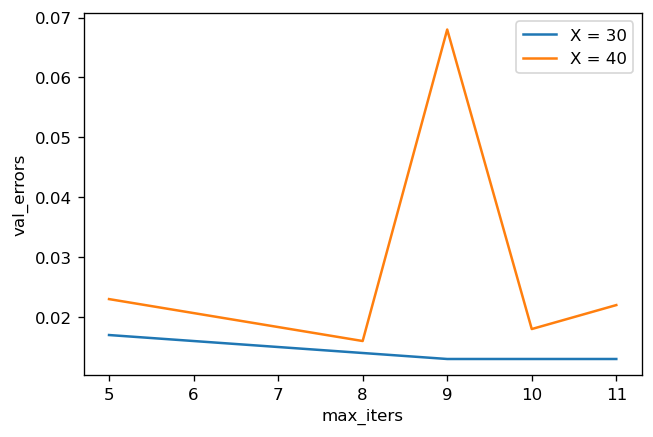

In [16]:
plt.figure(dpi=120)
plt.plot(max_iters, error_list1,label = "X = 30")
plt.plot(max_iters, error_list2,label="X = 40")
plt.xlabel('max_iters')
plt.ylabel('val_errors')
plt.legend()
plt.show()


#### By changing max_iters and X, we can see that when max_iters = 9, and X = 30, the val_errors is the smallest one. It seems that this one works best.

### Step 8
Here we train the perceptron model on the full training set, and see if it works on completely new
data. Combine the training set and the validation set and
learn using the best of the configuration previously found to figure out the validation error it should be.

In [17]:

vocabulary = words('spam_train.txt',X=30,N=-1)
train_x, train_y = feature_vectors('spam_train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y, max_iters=9)
val_x, val_y = feature_vectors('spam_test.txt', vocabulary)
error = perceptron_error(w, val_x, val_y)
print("Error made:", k)
print("Validation Error:",error)

Error made: 541
Validation Error: 0.02100000000000002


### Step 9
Suppose we only consider words that appear in at least X = 1200 emails. We first figure out the number of features.

In [18]:

words("spam_train.txt",X=1200,N = -1)
with open("vocabulary.json") as fIn:
    vocab = json.load(fIn)
    n_feat = len(vocab)
print('Number of features:', n_feat)

Number of features: 70


Here we verify wether the data is linearly seperable.

In [19]:
# Determine whether the data is linearly separable or not
# approach one: Empirical experiment by max_iters
# assumption: since from the previous observation, we detect that the the max_iter for different configurations will be around 5 - 12
# which means perceptron algorithm will converge when max_iter is around 5 - 12. If the max_iters is larger than 50 (which is a relatively large number)
# then this means the algorithm might not converge, and the max_iter should be over 50. The following is the test.
vocabulary = words('spam_train.txt',X=1200,N=-1)
train_x, train_y = feature_vectors('spam_train.txt', vocabulary)
w, k, iters = perceptron_train(train_x, train_y, max_iters=100)
print("iterations:", iters)
# We print the result and get the conclusion that the data is NOT linear seperable.

iterations: 101



#### No, it's not linear seperable, the reasons are as above.